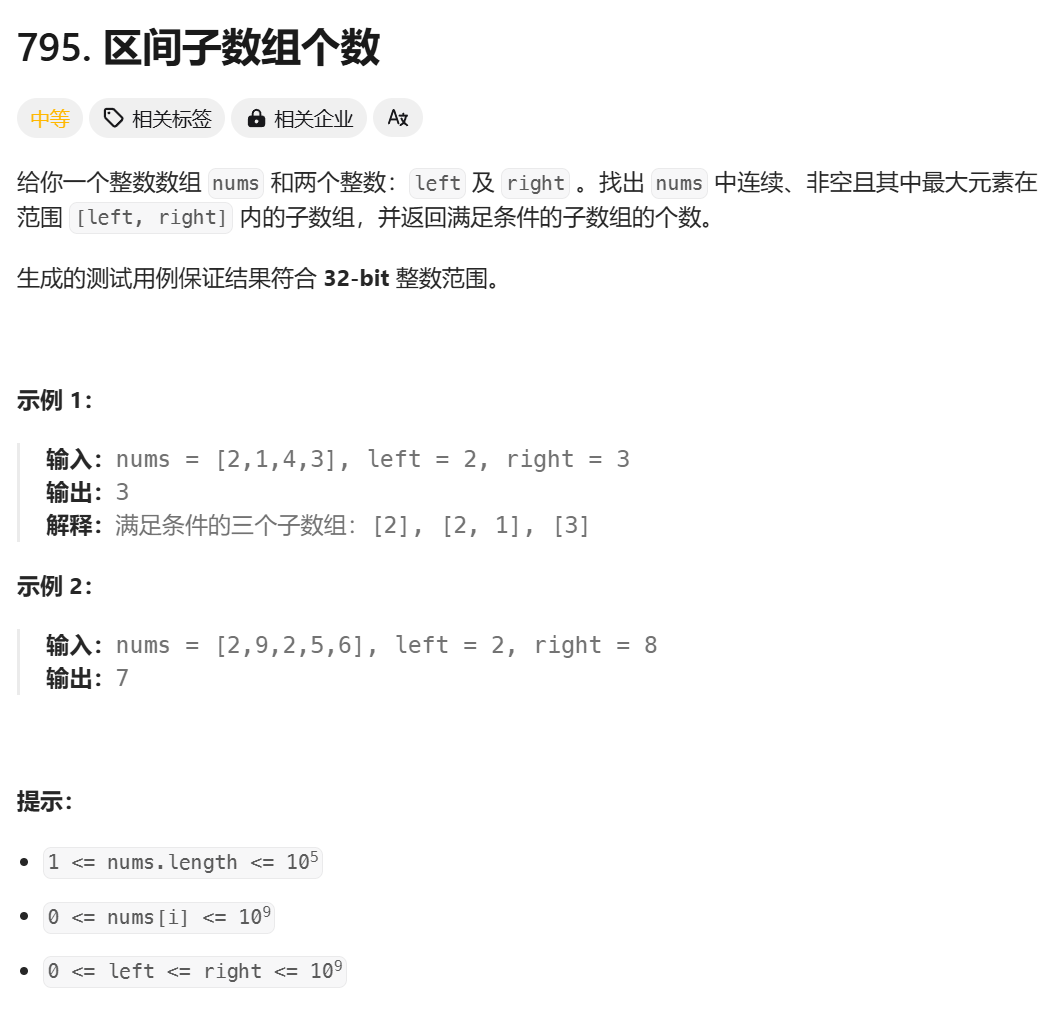



 分为 0, 1, 2 三类
- 0类 是小于left,
- 1类 是满足要求的
- 2类 是大于right的


        


In [12]:
from typing import List
class Solution(object):
    def numSubarrayBoundedMax(self, nums: List[int], left: int, right: int) -> int:
        # 主要是要区分大于范围与小于范围的
        # 大于范围的不能带着
        # 小于的虽然能带着，但是必须要有人适合范围
        # 如果大于范围中，left直接移动到 right +1（大的不能带着）
        # 还要记数满足的数个数，如果之前遇到的大的任然满足
        size = len(nums)
        l, r, res, index = 0, 0, 0, 0  # index记录最右边的较大值那么就能把它左边的都端点都包括起来
        flag = False
        while r < size:
            if nums[r] <= right and nums[r] >= left:
                res += (r - l + 1) # 如果本身能满足条件那么前面的都能加一个它
                index = r
                flag = True
            elif nums[r] > right and r != size - 1:  # 前面的都不能联系起来了
                l = r + 1
                flag = False
            elif nums[r] < left and flag: # 不能无条件的加
                res += (index - l + 1)
            r += 1
        return res
    
a = Solution()
print(a.numSubarrayBoundedMax([73,55,36,5,55,14,9,7,72,52], 32, 69))

22


神了


In [ ]:
''' 分为 0, 1, 2 三类
0类 是小于left,
1类 是满足要求的
2类 是大于right的
'''
class Solution:
    def numSubarrayBoundedMax(self, nums: List[int], left: int, right: int) -> int:
        ans, i0, i1 = 0, -1, -1
        for i, x in enumerate(nums):
            if x > right: i0 = i # 当出现 2类，前面的都不能要
            if x >= left: i1 = i  # 当出现 1 类， 将最右边的符合要求的位置记录
            ans += i1 - i0      # 当出现 0 类， 从最左边到最右边的符合要求的都能与0类组合成一个子数组
        return ans